# Methods of Theoretical Physics: Phys 4321
## Homework 12
*MaryLena Bleile*

Suppose that in Sherwood Forest, the average radius of a tree is $R=1 m$  and the
average number of trees per unit area is $\sigma = 0.005 m^2$. If Robin Hood shoots an
arrow in a random direction, how far, on average, will it travel before it strikes a tree?
1. Find the solution theoretically on paper, listing all the steps and assumptions.
2. Verify your answer with Monte Carlo computer code. Use any language that you like. Make sure that you shoot enough arrows in enough forests. Turn in the code electronically. Also turn in some runs, showing the code working and producing output.

In order to solve this problem theoretically, it is easier to consider the trees as points (corresponding to their center loci) and the trajectory of sight as a rectangle of width $2 R $, where $R=1$ is the average tree radius. First, in order to simplify the problem, we consider the case where arrow trajectory is discrete, moving one meter at a time. Thus, assuming trees are independently distributed in space, the average number of trees in  a rectangle of length $h$ will be $t= \sigma 2 R h $. But we wish to solve the problem for the length $h$ where exactly one tree is encapsulated ($t=1$). Solving for $h$ gives us $h = \frac{1}{2 \sigma R } = 200/2 = 100 (m)$. 

Further, we can think of this problem as the case where trees are occuring in space at a rate of $2 \sigma$ (which we get from plugging $1$ in for $h$ above). So the probability To begin, we will consider meters of space as discrete units. Assuming that the trees are independently distributed, then along any trajectory, the probability of the first tree occuring $t$ meters away from the origin will be $(1 - 2\sigma)^{t-1} 2\sigma $, which characterizes the Poisson distribution. Taking $t \rightarrow \delta t$ by letting the space between $t+1$ and $t$ tend to zero gives us the exponential distribution with rate parameter  $2 \sigma: f(t) = 2\sigma \exp(-2 \sigma t)$. But we know this distribution has expected value $1/(2\sigma) = 200/2 =100 (m)$ like before.  


 Infinite distance in forest  192
 Infinite distance in forest  292
 Infinite distance in forest  338
 Infinite distance in forest  625
 Infinite distance in forest  661
 Infinite distance in forest  837
 Infinite distance in forest  909
 result:  100.6205

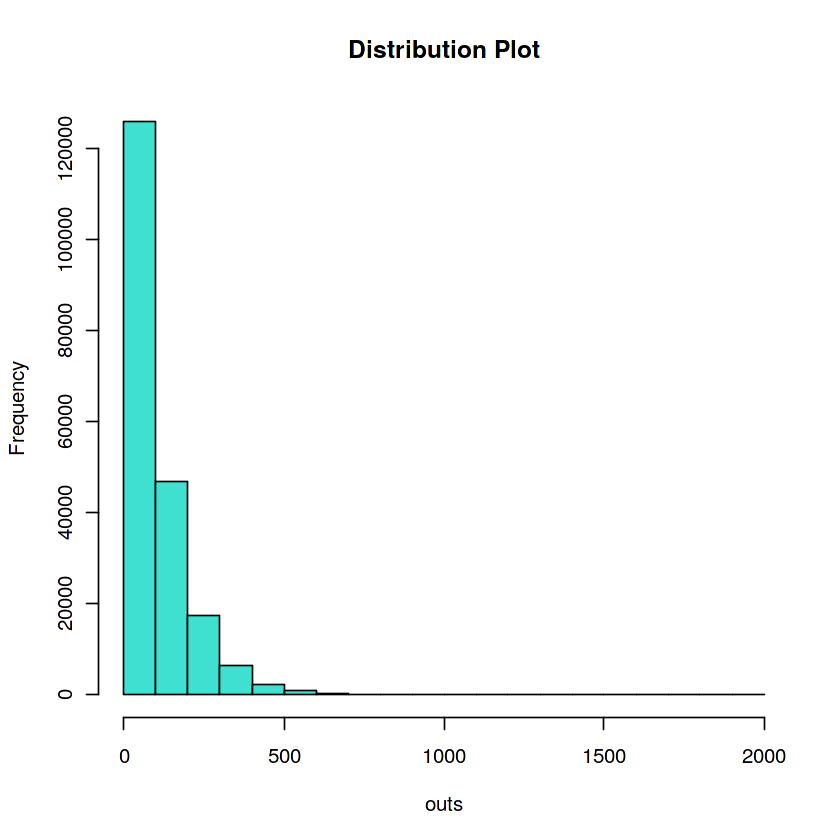

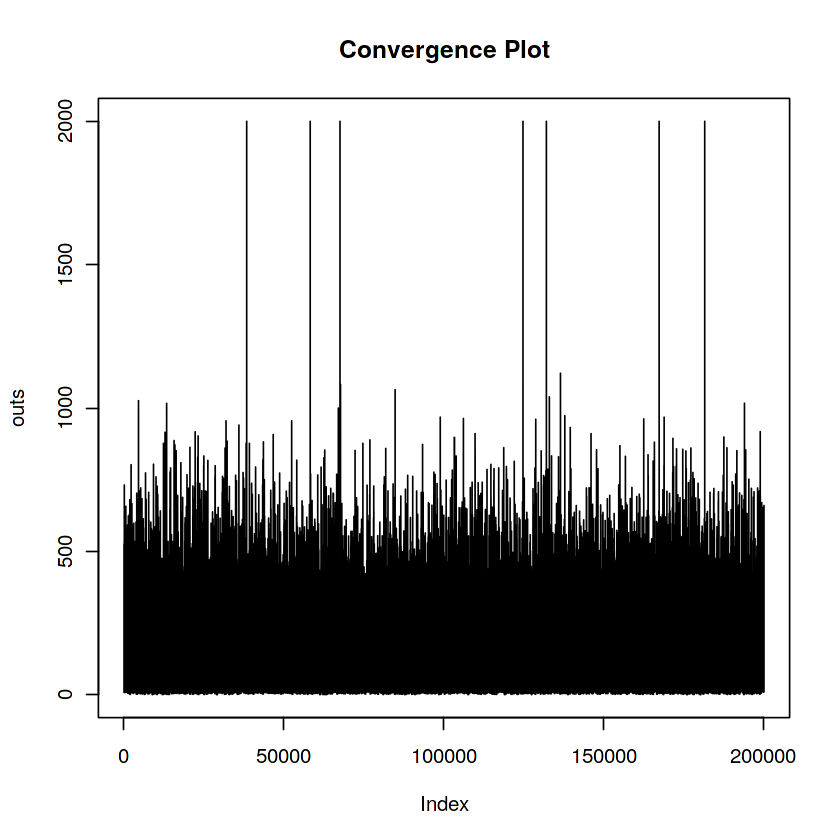

In [1]:
forests = 0
runningsum = 0
outs = c()

M=1000
n=200
while(forests<=M){
  forests=forests+1
  
  xtrees = runif(20000, -1000,1000)
  ytrees= runif(20000, -1000,1000)
  dists= sqrt(xtrees^2 + ytrees^2)
  thetarrow = runif(n,0,2*pi)
  
  for(ta in 1:length(thetarrow)){
      xarrow = 100*sin(thetarrow[ta])
      yarrow = 100*cos(thetarrow[ta])
      denom = xarrow^2+ yarrow^2
      num = xarrow*xtrees + yarrow*ytrees
      scalars= num/denom
      orthoprojx = xarrow*abs(scalars)
      orthoprojy = yarrow*abs(scalars)
      orthoproj = sqrt((orthoprojx - xtrees)^2+ (orthoprojy-ytrees)^2)
      if(sum(!is.na(orthoproj))==0){
          cat("\n orthoproj missing at forest", forests)
          break
      }
      #print(thetatree)
      if(min(orthoproj)<=1){
        d=min(dists[orthoproj<=1])
        #print(d)
      }else{
        d=2000
          cat("\n Infinite distance in forest ", forests)
      }
      
  runningsum=runningsum+d 
  outs=c(outs, d)
      
    
  }
  
  
}
cat("\n result: ", runningsum/(M*n))
hist(outs, col="turquoise", main="Distribution Plot")
plot(outs, type="l", main="Convergence Plot")

Note, in congruence with theory, the average distance from the origin is $100 (m)$ and the distances themselves appear to be exponentially distributed. From the convergence plot we can see that we have likely generated enough samples for our result to be reasonable.